# Land Use Similarity

In [10]:
import geopandas as gpd

blocks = gpd.read_parquet('../../data/blocks.parquet')
blocks.head(3)

,geometry,land_use,is_living,build_floor_area,living_demand,living_area,share_living,business_area,share_business,site_area,...,capacity_bus_station,capacity_bus_stop,capacity_pier,capacity_animal_shelter,capacity_military_kom,capacity_prison,capacity_landfill,capacity_plant_nursery,capacity_greenhouse_complex,capacity_warehouse
id,,,,,,,,,,,,,,,,,,,,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",None,True,43840.686518,50.641057,30688.480678,2.199357,13152.205840,0.942581,804466.712114,...,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((355412.142 6623378.149, 355411.7 662...",transport,True,10294.395525,53.114392,2177.690063,0.431105,8116.705462,1.606820,23173.129862,...,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",recreation,True,1173.871643,58.693582,821.710142,0.706252,352.161501,0.302679,363005.815802,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from blocksnet.config import service_types_config

prefix = 'capacity_'
services_dfs = {}
for column in [c for c in blocks.columns if prefix in c]:
    service_type = column.removeprefix(prefix)
    if service_type not in service_types_config:
        continue
    services_df = blocks[[column]].rename(columns={column : 'count'})
    services_dfs[service_type] = services_df
len(services_dfs)

63

In [12]:
from blocksnet.analysis.land_use import land_use_similarity

similarity_df = land_use_similarity(services_dfs)

2025-06-12 22:16:25.078 | INFO     | blocksnet.analysis.land_use.similarity.core:_preprocess_input:12 - Validating input data
2025-06-12 22:16:25.080 | INFO     | blocksnet.analysis.land_use.similarity.core:_preprocess_input:21 - 63/81 service types are provided
2025-06-12 22:16:25.417 | INFO     | blocksnet.analysis.land_use.similarity.core:_calculate_cosine_similarity:39 - Calculating cosine similarity


In [13]:
similarity_df.head()

,LandUse.RESIDENTIAL,LandUse.BUSINESS,LandUse.RECREATION,LandUse.INDUSTRIAL,LandUse.TRANSPORT,LandUse.SPECIAL,LandUse.AGRICULTURE,land_use,probability
0,0.282843,0.274721,0.000000,0.109109,0.000000,0.000000,0.000000,LandUse.RESIDENTIAL,0.282843
1,0.200000,0.194257,0.000000,0.154303,0.000000,0.000000,0.000000,LandUse.RESIDENTIAL,0.200000
2,0.141421,0.137361,0.000000,0.218218,0.235702,0.242536,0.258199,LandUse.AGRICULTURE,0.258199
3,0.244949,0.158610,0.105409,0.125988,0.136083,0.140028,0.149071,LandUse.RESIDENTIAL,0.244949
4,0.346410,0.280386,0.149071,0.000000,0.000000,0.000000,0.000000,LandUse.RESIDENTIAL,0.346410


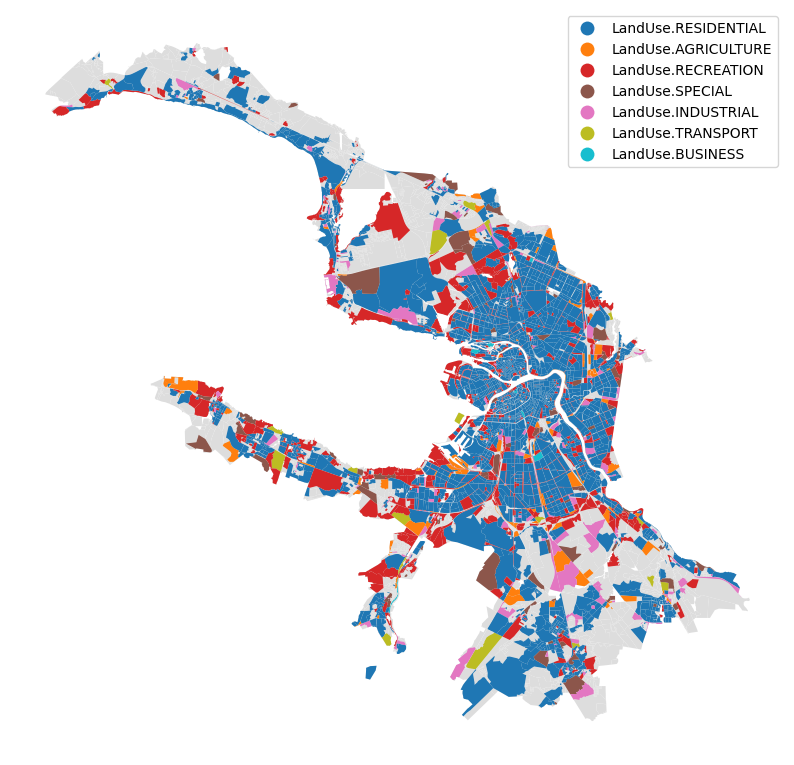

In [16]:
ax = blocks.plot(color='#ddd', figsize=(10,10))
blocks[['geometry']].join(similarity_df).plot('land_use', ax=ax, legend=True).set_axis_off()